In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
from pprint import pprint

In [2]:
# Make a reference to the comic_books_expanded.csv file path
income = "US Counties Education vs. Income.csv"
costindex = "data.csv"

In [3]:
# Import the comic_books_expanded.csv file as a DataFrame
income_df = pd.read_csv(income)
costindex_df = pd.read_csv(costindex)

In [4]:
# Check the special characters imported correctly
income_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84
1,35028,NM,"Los Alamos, NM",72366,75949,81306,2766,9098,20.54,67.56
2,8013,CO,"Boulder, CO",79698,83173,89593,45834,135876,21.24,62.97
3,24027,MD,"Howard, MD",78013,82041,86380,42538,136792,19.49,62.67
4,36061,NY,"New York, NY",173525,175327,195543,167960,777483,13.43,62.18


In [5]:
costindex_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,28,Mississippi,63.07084,2959473,2960075,2961279,2961879,2967297,-0.00020,-602,-0.00264,83.3,92.2,66.3,90.4,86.7,91.4
1,20,Kansas,36.24443,2963308,2954832,2937880,2929402,2853118,0.00287,8476,0.03862,86.5,91.7,72.6,100.2,97.3,90.3
2,1,Alabama,100.65438,5097641,5073187,5024279,4999822,4779736,0.00482,24454,0.06651,87.9,98.2,70.1,100.7,92.7,94.1
3,40,Oklahoma,58.63041,4021753,4000953,3959353,3938551,3751351,0.00520,20800,0.07208,87.9,94.5,74.7,95.1,94.8,93.5
4,13,Georgia,191.59470,11019186,10916760,10711908,10609487,9687653,0.00938,102426,0.13745,88.8,95.9,74.4,90.5,92.6,96.6


In [6]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "state","costIndex" 

cost_reduced_df =costindex_df[["state", "costIndex" ]]
cost_reduced_df.head()

,state,costIndex
0,Mississippi,83.3
1,Kansas,86.5
2,Alabama,87.9
3,Oklahoma,87.9
4,Georgia,88.8


In [7]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [8]:
# Change state to abbreviation
new_cost_df =cost_reduced_df.replace({"state": us_state_to_abbrev})
new_cost_df.head()

,state,costIndex
0,MS,83.3
1,KS,86.5
2,AL,87.9
3,OK,87.9
4,GA,88.8


In [9]:
# Merge the two data sets
merged_df = pd.merge(income_df, new_cost_df, on=["state"])
merged_df.head()

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8


In [26]:
# Calculate the adjusted per capita income
merged_df["Adjusted per capita income 2021"] = merged_df['per_capita_personal_income_2021']/merged_df['costIndex']*100
merged_df

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex,Adjusted per capita income 2021
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8,105700.392927
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8,88658.153242
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8,73330.058939
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8,108822.200393
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8,61840.864440
...,...,...,...,...,...,...,...,...,...,...,...,...
3001,32033,NV,"White Pine, NV",48628,53734,56241,2340,920,32.69,12.85,106.3,52907.808090
3002,32023,NV,"Nye, NV",37624,39534,42796,13340,4346,38.02,12.39,106.3,40259.642521
3003,32015,NV,"Lander, NV",67315,69536,72511,1500,479,38.62,12.33,106.3,68213.546566
3004,32011,NV,"Eureka, NV",47549,47833,49606,479,142,39.36,11.67,106.3,46666.039511


In [27]:
# Then Format to go to two decimal places, include a dollar sign, and use comma notation
merged_df['Adjusted per capita income 2021'] = merged_df['Adjusted per capita income 2021'].astype('float64')
merged_df

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2015_2019,costIndex,Adjusted per capita income 2021
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8,105700.392927
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8,88658.153242
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8,73330.058939
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8,108822.200393
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8,61840.864440
...,...,...,...,...,...,...,...,...,...,...,...,...
3001,32033,NV,"White Pine, NV",48628,53734,56241,2340,920,32.69,12.85,106.3,52907.808090
3002,32023,NV,"Nye, NV",37624,39534,42796,13340,4346,38.02,12.39,106.3,40259.642521
3003,32015,NV,"Lander, NV",67315,69536,72511,1500,479,38.62,12.33,106.3,68213.546566
3004,32011,NV,"Eureka, NV",47549,47833,49606,479,142,39.36,11.67,106.3,46666.039511


In [28]:
# Rename column bachelor_degree_percentage_2015_2019 to bachelor_degree_percentage_2016_2019
renamed_df = merged_df.rename(columns={"bachelor_degree_percentage_2015_2019": "bachelor_degree_percentage_2016_2020"})
renamed_df

,county_FIPS,state,county,per_capita_personal_income_2019,per_capita_personal_income_2020,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2016_2020,costIndex,Adjusted per capita income 2021
0,51013,VA,"Arlington, VA",97629,100687,107603,19573,132394,11.21,75.84,101.8,105700.392927
1,51107,VA,"Loudoun, VA",82681,85568,90254,52006,160853,19.92,61.62,101.8,88658.153242
2,51087,VA,"Henrico, VA",68826,69938,74650,60829,101632,26.49,44.26,101.8,73330.058939
3,51075,VA,"Goochland, VA",104892,106031,110781,4586,7705,26.07,43.81,101.8,108822.200393
4,51179,VA,"Stafford, VA",56078,58744,62954,28316,39872,29.36,41.35,101.8,61840.864440
...,...,...,...,...,...,...,...,...,...,...,...,...
3001,32033,NV,"White Pine, NV",48628,53734,56241,2340,920,32.69,12.85,106.3,52907.808090
3002,32023,NV,"Nye, NV",37624,39534,42796,13340,4346,38.02,12.39,106.3,40259.642521
3003,32015,NV,"Lander, NV",67315,69536,72511,1500,479,38.62,12.33,106.3,68213.546566
3004,32011,NV,"Eureka, NV",47549,47833,49606,479,142,39.36,11.67,106.3,46666.039511


In [29]:
# Remove columns that not needed
final_df = renamed_df[["state","county","per_capita_personal_income_2021","associate_degree_numbers_2016_2020",\
                     "bachelor_degree_numbers_2016_2020","associate_degree_percentage_2016_2020","bachelor_degree_percentage_2016_2020",\
                     "costIndex","Adjusted per capita income 2021"]].copy()
final_df.head()

,state,county,per_capita_personal_income_2021,associate_degree_numbers_2016_2020,bachelor_degree_numbers_2016_2020,associate_degree_percentage_2016_2020,bachelor_degree_percentage_2016_2020,costIndex,Adjusted per capita income 2021
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.392927
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.153242
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.058939
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.200393
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.864440


In [30]:
# Creating a dictionary to rename columns
col_dict = {"per_capita_personal_income_2021":"Per Capita Income 2021",
               "associate_degree_numbers_2016_2020":"Count of Associate Degrees",
               "bachelor_degree_numbers_2016_2020":"Count of Bachelor Degrees",
               "associate_degree_percentage_2016_2020":"Percent of Associate Degrees",
               "bachelor_degree_percentage_2016_2020":"Percent of Bachelor Degrees",
               "Adjusted per capita income 2021":"Adjusted Per Capita Personal Income 2021"}

In [31]:
final_df.rename(columns = col_dict, inplace=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3005
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state                                     3006 non-null   object 
 1   county                                    3006 non-null   object 
 2   Per Capita Income 2021                    3006 non-null   int64  
 3   Count of Associate Degrees                3006 non-null   int64  
 4   Count of Bachelor Degrees                 3006 non-null   int64  
 5   Percent of Associate Degrees              3006 non-null   float64
 6   Percent of Bachelor Degrees               3006 non-null   float64
 7   costIndex                                 3006 non-null   float64
 8   Adjusted Per Capita Personal Income 2021  3006 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 234.8+ KB


In [32]:
# Using the group by to find the averages by state
state_avgs = final_df.groupby(["state"]).mean()
state_avgs.head()


,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021
state,,,,,,,
AK,68754.222222,6093.222222,5273.259259,32.672963,22.431481,127.1,54094.588688
AL,44408.119403,15129.447761,13090.208955,29.605373,18.593284,87.9,50521.182483
AR,43382.640000,15872.266667,12844.906667,29.310400,16.986933,90.9,47725.676568
AZ,47794.800000,109163.400000,97913.200000,36.160000,21.231333,103.2,46312.790698
CA,66942.034483,132592.189655,159601.258621,33.711207,28.092931,142.2,47075.973617


In [33]:
# finding correlation coefficient for Associate degree
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of Associate Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of Associate Degrees"]+interecept

R-Squared is 0.010626731015746163


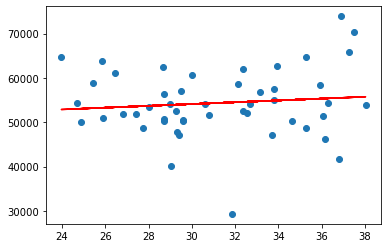

In [34]:
plt.scatter(state_avgs["Percent of Associate Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
plt.plot(state_avgs["Percent of Associate Degrees"],y_pred,color="red")
print(f'R-Squared is {rvalue**2}')
plt.show()

In [35]:
# Finding correlation coefficient for Bachelor degree
(slope, interecept,rvalue,pvalue,stderr) = stats.linregress(state_avgs["Percent of Bachelor Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
y_pred = slope*state_avgs["Percent of Bachelor Degrees"]+interecept

R-Squared is 0.025058632914199644


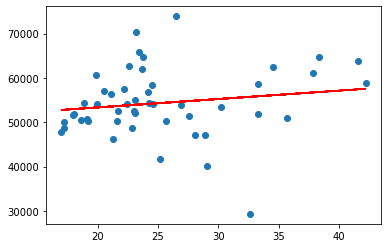

In [36]:
plt.scatter(state_avgs["Percent of Bachelor Degrees"],state_avgs["Adjusted Per Capita Personal Income 2021"])
plt.plot(state_avgs["Percent of Bachelor Degrees"], y_pred, color="red")
print(f'R-Squared is {rvalue**2}')
plt.show()

Split states into regions

In [37]:
# Use the Pandas copy function to create DataFrame called region_df to store region
region_df= final_df.copy()
# Add an empty column, "region," to the DataFrame so you can store the region the state belong
region_df['region']= ""
# Display sample data
region_df

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.392927,
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.153242,
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.058939,
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.200393,
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.864440,
...,...,...,...,...,...,...,...,...,...,...
3001,NV,"White Pine, NV",56241,2340,920,32.69,12.85,106.3,52907.808090,
3002,NV,"Nye, NV",42796,13340,4346,38.02,12.39,106.3,40259.642521,
3003,NV,"Lander, NV",72511,1500,479,38.62,12.33,106.3,68213.546566,
3004,NV,"Eureka, NV",49606,479,142,39.36,11.67,106.3,46666.039511,


In [38]:
# Add region to the DataFrame

South= ['WV', 'DC', 'MD', 'VA', 'KY', 'TN', 'NC', 'MS', 'AR', 'LA', 'AL', 'GA', 'SC', 'FL', 'DE']   
Southwest= ['AZ', 'NM', 'OK', 'TX']    
West= ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AK', 'HI']    
Midwest= ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH']    
Northeast= ['ME', 'VT', 'NY', 'NH', 'MA', 'RI', 'CT', 'NJ', 'PA']


region_df['region'] = np.where(region_df['state'].isin(South), 'South', np. NaN)
region_df['region'] = np.where(region_df['state'].isin(Southwest), 'Southwest', region_df['region'])                               
region_df['region'] = np.where(region_df['state'].isin(West), 'West', region_df['region'])                               
region_df['region'] = np.where(region_df['state'].isin(Midwest), 'Midwest', region_df['region'] )                              
region_df['region'] = np.where(region_df['state'].isin(Northeast), 'Northeast', region_df['region'])


region_df.head()    
        
      


,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.392927,South
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.153242,South
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.058939,South
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.200393,South
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.864440,South


In [40]:
region_avg_df = region_df.groupby(["region"]).mean()
region_avg_df

,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021
region,,,,,,,
Midwest,55209.319392,14030.187262,14314.229087,33.149049,22.464154,92.990970,59334.955077
Northeast,61969.322581,43861.170507,68162.880184,26.603364,30.611382,122.123963,51644.465983
South,47158.381743,17521.460581,18087.242739,28.940902,19.966919,92.699274,50826.334860
Southwest,53178.833333,21732.973545,21621.460317,30.569233,20.083968,91.591799,58075.695513
West,58621.417722,37561.331646,42336.202532,34.800886,26.754734,113.698481,52234.329686


In [41]:
# Split DataFrame into regions
south_region_df = region_df.loc[region_df["region"]== "South", :]

# Display sample data
south_region_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
0,VA,"Arlington, VA",107603,19573,132394,11.21,75.84,101.8,105700.392927,South
1,VA,"Loudoun, VA",90254,52006,160853,19.92,61.62,101.8,88658.153242,South
2,VA,"Henrico, VA",74650,60829,101632,26.49,44.26,101.8,73330.058939,South
3,VA,"Goochland, VA",110781,4586,7705,26.07,43.81,101.8,108822.200393,South
4,VA,"Stafford, VA",62954,28316,39872,29.36,41.35,101.8,61840.864440,South


In [42]:
southwest_region_df = region_df.loc[region_df["region"]== "Southwest", :]
southwest_region_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
72,NM,"Los Alamos, NM",81306,2766,9098,20.54,67.56,91.0,89347.252747,Southwest
73,NM,"Santa Fe, NM",69528,29296,45681,26.10,40.70,91.0,76404.395604,Southwest
74,NM,"Bernalillo, NM",53616,149383,165802,31.79,35.28,91.0,58918.681319,Southwest
75,NM,"Taos, NM",44709,8344,7986,33.73,32.28,91.0,49130.769231,Southwest
76,NM,"Sandoval, NM",51807,34601,30989,34.58,30.97,91.0,56930.769231,Southwest


In [43]:
west_region_df = region_df.loc[region_df["region"]== "West", :]
west_region_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
104,CO,"Boulder, CO",89593,45834,135876,21.24,62.97,105.3,85083.570750,West
105,CO,"Pitkin, CO",198939,2932,8459,21.20,61.17,105.3,188925.925926,West
106,CO,"Douglas, CO",87841,61914,134307,27.02,58.61,105.3,83419.753086,West
107,CO,"Gunnison, CO",59514,2434,6228,22.47,57.51,105.3,56518.518519,West
108,CO,"San Miguel, CO",109613,1288,3475,20.98,56.61,105.3,104095.916429,West


In [44]:
midwest_region_df = region_df.loc[region_df["region"]== "Midwest", :]
midwest_region_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
506,IN,"Hamilton, IN",85814,49452,128224,22.90,59.37,90.6,94717.439294,Midwest
507,IN,"Boone, IN",84985,11142,22516,25.15,50.83,90.6,93802.428256,Midwest
508,IN,"Monroe, IN",52392,21967,38698,25.71,45.29,90.6,57827.814570,Midwest
509,IN,"Tippecanoe, IN",45950,27031,42667,25.17,39.73,90.6,50717.439294,Midwest
510,IN,"Hendricks, IN",59804,31743,43277,28.51,38.88,90.6,66008.830022,Midwest


In [45]:
northeast_region_df = region_df.loc[region_df["region"]== "Northeast", :]
northeast_region_df.head()

,state,county,Per Capita Income 2021,Count of Associate Degrees,Count of Bachelor Degrees,Percent of Associate Degrees,Percent of Bachelor Degrees,costIndex,Adjusted Per Capita Personal Income 2021,region
191,NY,"New York, NY",195543,167960,777483,13.43,62.18,148.2,131945.344130,Northeast
192,NY,"Tompkins, NY",51377,13743,31848,22.90,53.08,148.2,34667.341430,Northeast
193,NY,"Westchester, NY",119705,133318,333530,19.88,49.73,148.2,80772.604588,Northeast
194,NY,"Nassau, NY",99597,215448,441749,22.80,46.74,148.2,67204.453441,Northeast
195,NY,"Albany, NY",70947,55356,89318,26.99,43.55,148.2,47872.469636,Northeast
